In [3]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import cm

import numpy

plt.rcParams['figure.figsize'] = (10.0, 10.0) 

/home/chbrandt/.conda/envs/booq-dev/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
# first of all, let us define some parameters
#
# size of the images
sx = 500
sy = 500
# number of sources on each image
nsrc1 = int( 0.05 * (sx*sy)/(sx+sy) )
nsrc2 = int( 0.5 * nsrc1 )
# typical error radius (in pixels)
rerr1 = 20
rerr2 = rerr1

In [10]:
# generate coordinate pairs for each image
def generate_positions(npts,img_shape):
    """
    Generate 'npts' points uniformly across 'image_shape'.
    
    Args:
        npts      : number of points to generate
        img_shape : (y,x) shape where to generate points

    Returns:
        Pair_Coordinates_List : list of (y,x) tuples
    """
    import numpy as np
    _sy,_sx = img_shape
    assert _sy>=5 and _sx>=5 # because I want
    indy = np.random.randint(0,_sy-1,npts)
    indx = np.random.randint(0,_sx-1,npts)
    _inds = zip(indy,indx)
    return _inds

# "sources 1"
coords1 = generate_positions(nsrc1,(sy,sx))
assert isinstance(coords1,list) and len(coords1) is nsrc1

In [26]:
# create the positions table
def create_positions_table(coords,err_radius):
    """
    """
    tab = {}
    for i,oo in enumerate(coords):
        i = i+1
        tab[i] = [i,oo[1],oo[0],err_radius]
    return tab

# table for "sources 1"
tab1 = create_positions_table(coords1,rerr1)

def tab2df(tab):
    nt = {'ID':[],'x':[],'y':[],'r':[]}
    for k,v in tab.iteritems():
        nt['ID'].append(v[0])
        nt['x'].append(v[1])
        nt['y'].append(v[2])
        nt['r'].append(v[3])
    import pandas
    df = pandas.DataFrame(nt)
    return df

df1 = tab2df(tab1)

In [27]:
# create and draw each source on black(null) images
def draw_image_sources(tab_positions,img_shape,colormap='colorful'):
    """
    """
    def color_filling(mode='colorful'):
        def _colorful(x,y,size):
            _R = int(255 - ( int(x/256) + int(y/256)*(1 + ceil(size[0]/256)) )) #TODO: restrict total size of image to avoid _R<=0
            _G = x%256
            _B = y%256
            return (_R,_G,_B)

        def _blue(x,y,size):
            _R = 0
            _G = 0
            _B = 255
            return (_R,_G,_B)

        def _green(x,y,size):
            _R = 0
            _G = 255
            _B = 0
            return (_R,_G,_B)

        def _red(x,y,size):
            _R = 255
            _G = 0
            _B = 0
            return (_R,_G,_B)

        foos = {'blue'    : _blue,
                'red'     : _red,
                'green'   : _green,
                'colorful': _colorful}
        
        try:
            foo = foos[mode]
        except:
            foo = _colorful
        return foo
        
        
    from math import ceil
    from PIL import Image,ImageDraw
    assert(isinstance(img_shape,tuple) and len(img_shape) is 2)
    size = img_shape[::-1]
    # Modification to accomplish color codes ---
    #mode = 'L'
    mode = 'RGB'
    # ---
    color = "black"
    img = Image.new(mode,size,color)
    assert(len(tab_positions)>=1)
    #
    dictColorId = {}
    filling_foo = color_filling(colormap)
    #
    for i,src in tab_positions.items():
        assert isinstance(src,list) and src is tab_positions[i]
        assert len(src)>=4, "length of table raw %d is %d" % (i,len(src))
        assert i==src[0]
        draw = ImageDraw.Draw(img)
        x = src[1]
        assert 0<=x and x<size[0], "coordinate x is %d" % x
        y = src[2]
        assert 0<=y and y<size[1], "coordinate y is %d" % y
        r = src[3]
        assert r<size[0]/2 and r<size[1]/2
        box = (x-r,y-r,x+r,y+r)
        # Modification to accomplish color codes ---
        #fill=255
        fill = filling_foo(x,y,size)
        # ---
        dictColorId[str(fill)] = i
        draw.ellipse(box,fill=fill)
        del draw,box,x,y,r
    return img,dictColorId

img1,cor2id1 = draw_image_sources(tab1,(sy,sx),colormap='blue')
#img1.show()

Catalog A:
----------
    ID   r    x    y
0    1  20  211  254
1    2  20  379   68
2    3  20  251  375
3    4  20  148  180
4    5  20   46   78
5    6  20  258  381
6    7  20  451  195
7    8  20  455  116
8    9  20  128    7
9   10  20  393  429
10  11  20  190  108
11  12  20  261  164


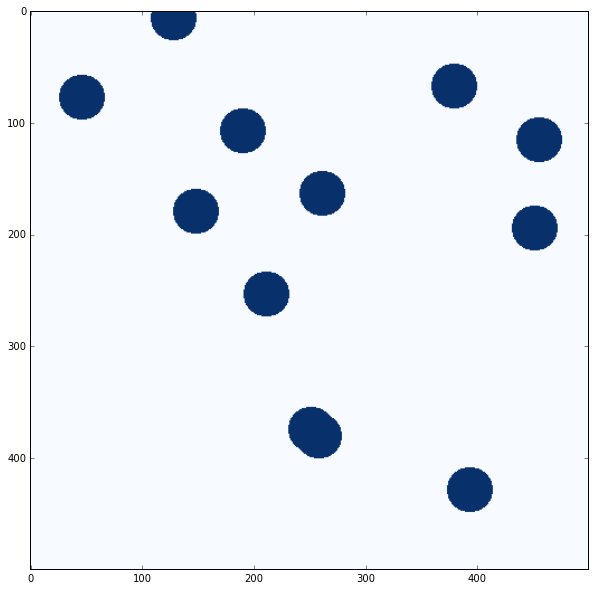

In [28]:
# cmap reference:
#
# cm api: http://matplotlib.org/api/cm_api.html
# cmaps : http://matplotlib.org/users/colormaps.html
# imshow: http://matplotlib.org/users/image_tutorial.html
#cmap = cm.get_cmap('Blues')

def pilImage_2_numpyArray(img,shape):
    sx,sy = shape
    img_array = numpy.array(list(img.getdata())).reshape(sx,sy,3)
    return img_array

def rgbArray_2_mono(img_arr,chanel='R'):
    chanels = {'R':0,
               'G':1,
               'B':2}
    _i = chanels[chanel]
    return img_arr[:,:,_i]

img1_array = pilImage_2_numpyArray(img1,[sx,sy])
img1_mono = rgbArray_2_mono(img1_array,'B')

plt.imshow(img1_mono,cmap='Blues')
print "Catalog A:"
print "----------"
print df1

In [29]:
# do the same steps for "sources 2"
coords2 = generate_positions(nsrc2,(sy,sx))
assert isinstance(coords2,list) and len(coords2) is nsrc2
tab2 = create_positions_table(coords2,rerr2)
img2,cor2id2 = draw_image_sources(tab2,(sy,sx),colormap='red')
#img2.show()
df2 = tab2df(tab2)

Catalog B:
----------
   ID   r    x    y
0   1  20  138  266
1   2  20  128  338
2   3  20  211   96
3   4  20  299  193
4   5  20  332  229
5   6  20   74  235


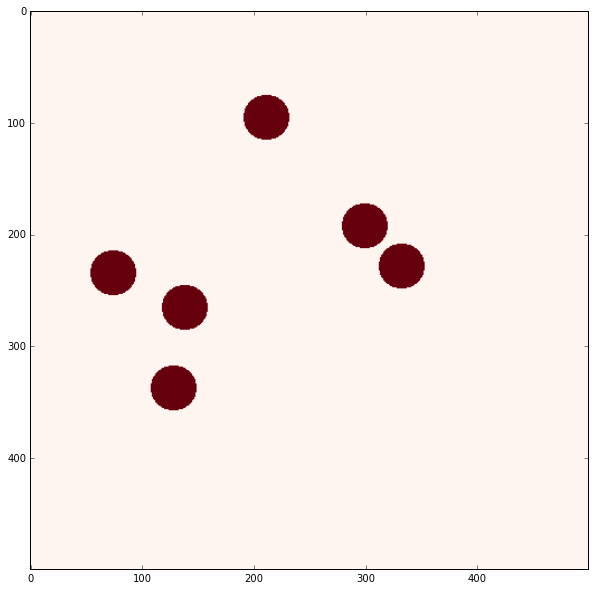

In [30]:
img2_array = pilImage_2_numpyArray(img2,[sx,sy])
img2_mono = rgbArray_2_mono(img2_array,'R')

print "Catalog B:"
print "----------"
print df2
plt.imshow(img2_mono,cmap='Reds')

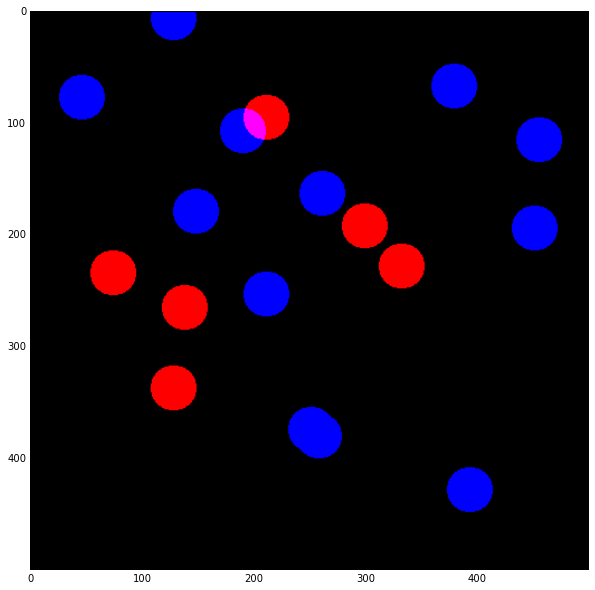

In [31]:
def add_arrays_2_image(img1,img2):
    """
    """
    def array_2_image(arr):
        from PIL import Image
        imgout = Image.fromarray(numpy.uint8(arr))
        return imgout
    return array_2_image(img1+img2)

img_sum = add_arrays_2_image(img1_array,img2_array)
plt.imshow(img_sum)

In [52]:
def nn_search(catA,catB):
    """
    """
    
    import pandas
    assert isinstance(catA,pandas.DataFrame)
    assert isinstance(catB,pandas.DataFrame)
    
    A = catA.copy()
    B = catB.copy()
    
    from astropy.coordinates import SkyCoord
    from astropy import units
    norm_fact = 500.0
    Ax_norm = A.x / norm_fact
    Ay_norm = A.y / norm_fact
    A_coord = SkyCoord(ra=Ax_norm, dec=Ay_norm, unit=units.deg)

    Bx_norm = B.x / norm_fact
    By_norm = B.y / norm_fact
    B_coord = SkyCoord(ra=Bx_norm, dec=By_norm, unit=units.deg)

    from astropy.coordinates import match_coordinates_sky
    match_A_nn_idx, match_A_nn_sep, _d3d = match_coordinates_sky(A_coord, B_coord)
    match_B_nn_idx, match_B_nn_sep, _d3d = match_coordinates_sky(B_coord, A_coord)


    A['NN_in_B'] = B.ID[match_A_nn_idx].values
    B['NN_in_A'] = A.ID[match_B_nn_idx].values

    import numpy
    A_matched_pairs = zip(numpy.arange(len(match_A_nn_idx)),
                          match_A_nn_idx )
    B_matched_pairs = set(zip(match_B_nn_idx,
                              numpy.arange(len(match_B_nn_idx))))

    duplicate_pairs = []
    duplicate_dists = []
    for i,p in enumerate(A_matched_pairs):
        if p in B_matched_pairs:
            duplicate_pairs.append(p)
            duplicate_dists.append(match_A_nn_sep[i].value)

    A_matched_idx,B_matched_idx = zip(*duplicate_pairs)
    df_matched = pandas.DataFrame({ 'A_idx':A_matched_idx,
                                    'B_idx':B_matched_idx,
                                    'separation':duplicate_dists})
    df_matched = df_matched.set_index('A_idx')

    A.columns = [ 'A_'+c for c in A.columns ]
    B.columns = [ 'B_'+c for c in B.columns ]

    B_matched = B.iloc[df_matched.B_idx]
    B_matched['A_idx'] = df_matched.index
    B_matched = B_matched.set_index('A_idx')

    B_matched['dist'] = numpy.asarray(df_matched.separation * norm_fact, dtype=int)

    df = pandas.concat([A,B_matched],axis=1)
    return df

from astropy.table import Table
table_match = Table.from_pandas( nn_search(df1,df2) )
table_match.show_in_notebook()

/home/chbrandt/.conda/envs/booq-dev/lib/python2.7/site-packages/ipykernel/__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


A_ID,A_r,A_x,A_y,A_NN_in_B,B_ID,B_r,B_x,B_y,B_NN_in_A,dist
1,20,211,254,1,1.0,20.0,138.0,266.0,1.0,73.0
2,20,379,68,4,--,--,--,--,--,--
3,20,251,375,2,--,--,--,--,--,--
4,20,148,180,1,--,--,--,--,--,--
5,20,46,78,6,--,--,--,--,--,--
6,20,258,381,2,--,--,--,--,--,--
7,20,451,195,5,--,--,--,--,--,--
8,20,455,116,5,--,--,--,--,--,--
9,20,128,7,3,--,--,--,--,--,--
10,20,393,429,5,--,--,--,--,--,--
